In [1]:
# packages
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import pprint

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split as train_valid_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import os

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Description

In [2]:
# load dataset
maintpath = ''
fullpath = os.path.join(maintpath, "train.csv")
train = pd.read_csv(fullpath)

In [3]:
# model relevant features
feature_cols = ['RowId', 'IntersectionId', 'Latitude',
                'Longitude', 'EntryStreetName',
                'ExitStreetName', 'EntryHeading',
                'ExitHeading', 'Hour', 'Weekend',
                'Month', 'Path', 'City']

# target variables
target_cols = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50',
               'TotalTimeStopped_p80', 'DistanceToFirstStop_p20',
               'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']

# Categorical variables
cat_cols = ['City', 'ExitHeading', 'EntryHeading']


In [4]:
# dataset examples
train.head()

RowId  IntersectionId  Latitude  Longitude               EntryStreetName  \
0  1920335               0  33.79166  -84.43003  Marietta Boulevard Northwest   
1  1920336               0  33.79166  -84.43003  Marietta Boulevard Northwest   
2  1920337               0  33.79166  -84.43003  Marietta Boulevard Northwest   
3  1920338               0  33.79166  -84.43003  Marietta Boulevard Northwest   
4  1920339               0  33.79166  -84.43003  Marietta Boulevard Northwest   

                 ExitStreetName EntryHeading ExitHeading  Hour  Weekend  ...  \
0  Marietta Boulevard Northwest           NW          NW     0        0  ...   
1  Marietta Boulevard Northwest           SE          SE     0        0  ...   
2  Marietta Boulevard Northwest           NW          NW     1        0  ...   
3  Marietta Boulevard Northwest           SE          SE     1        0  ...   
4  Marietta Boulevard Northwest           NW          NW     2        0  ...   

   TimeFromFirstStop_p40 TimeFromFirstStop_p50  TimeFromFirstStop_p60  \
0                      0                     0                      0   
1                      0                     0                      0   
2                      0                     0                      0   
3                      0                     0                      0   
4                      0                     0                      0   

   TimeFromFirstStop_p80  DistanceToFirstStop_p20  DistanceToFirstStop_p40  \
0                      0                      0.0                      0.0   
1                      0                      0.0                      0.0   
2                      0                      0.0                      0.0   
3                      0                      0.0                      0.0   
4                      0                      0.0                      0.0   

   DistanceToFirstStop_p50  DistanceToFirstStop_p60  DistanceToFirstStop_p80  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

      City  
0  Atlanta  
1  Atlanta  
2  Atlanta  
3  Atlanta  
4  Atlanta  

[5 rows x 28 columns]

In [5]:
# columns datatypes details
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857409 entries, 0 to 857408
Data columns (total 28 columns):
RowId                      857409 non-null int64
IntersectionId             857409 non-null int64
Latitude                   857409 non-null float64
Longitude                  857409 non-null float64
EntryStreetName            849220 non-null object
ExitStreetName             851875 non-null object
EntryHeading               857409 non-null object
ExitHeading                857409 non-null object
Hour                       857409 non-null int64
Weekend                    857409 non-null int64
Month                      857409 non-null int64
Path                       857409 non-null object
TotalTimeStopped_p20       857409 non-null int64
TotalTimeStopped_p40       857409 non-null int64
TotalTimeStopped_p50       857409 non-null int64
TotalTimeStopped_p60       857409 non-null int64
TotalTimeStopped_p80       857409 non-null int64
TimeFromFirstStop_p20      857409 non-null int6

### Target variables
Correlation Coefficient for target variables

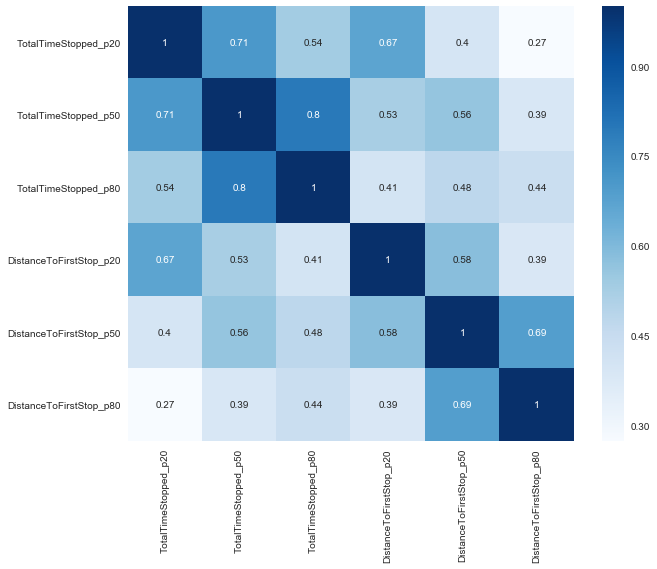

In [36]:
g_target = train[target_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(g_target, annot=True, cmap='Blues')
plt.show()

### Features variables
Correlation Coefficient for feature variables

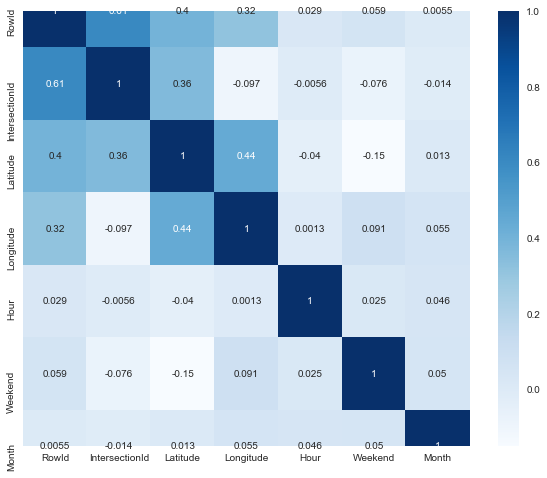

In [7]:
# relationship between x and y features variables.
g_features = train[feature_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(g_features,annot=True,cmap='Blues')
plt.show()

In [8]:
train[feature_cols].describe(include='all').T

count unique                                        top  \
RowId            857409    NaN                                        NaN   
IntersectionId   857409    NaN                                        NaN   
Latitude         857409    NaN                                        NaN   
Longitude        857409    NaN                                        NaN   
EntryStreetName  849220   1707                         North Broad Street   
ExitStreetName   851875   1693                         North Broad Street   
EntryHeading     857409      8                                          E   
ExitHeading      857409      8                                          W   
Hour             857409    NaN                                        NaN   
Weekend          857409    NaN                                        NaN   
Month            857409    NaN                                        NaN   
Path             857409  15111  North Broad Street_N_North Broad Street_N   
City             857409      4                               Philadelphia   

                   freq         mean       std          min          25%  \
RowId               NaN  2.34904e+06    247513  1.92034e+06  2.13469e+06   
IntersectionId      NaN      836.331   644.201            0          306   
Latitude            NaN      39.6576   2.92076        33.65      39.9376   
Longitude           NaN     -77.9004   5.97581     -87.8367     -84.3877   
EntryStreetName   18938          NaN       NaN          NaN          NaN   
ExitStreetName    19507          NaN       NaN          NaN          NaN   
EntryHeading     172814          NaN       NaN          NaN          NaN   
ExitHeading      173419          NaN       NaN          NaN          NaN   
Hour                NaN      12.4275    6.0621            0            8   
Weekend             NaN     0.277485  0.447758            0            0   
Month               NaN      9.10445   1.99323            1            7   
Path               7032          NaN       NaN          NaN          NaN   
City             388322          NaN       NaN          NaN          NaN   

                         50%          75%          max  
RowId            2.34904e+06  2.56339e+06  2.77774e+06  
IntersectionId           685         1254         2875  
Latitude             39.9858      41.9186      42.3818  
Longitude           -75.1733     -75.0802     -71.0235  
EntryStreetName          NaN          NaN          NaN  
ExitStreetName           NaN          NaN          NaN  
EntryHeading             NaN          NaN          NaN  
ExitHeading              NaN          NaN          NaN  
Hour                      13           17           23  
Weekend                    0            1            1  
Month                      9           11           12  
Path                     NaN          NaN          NaN  
City                     NaN          NaN          NaN

North Broad Street           18938
Roosevelt Boulevard          12490
South Broad Street           11906
Washington Street            10516
Market Street                 9725
                             ...  
West 67th Street                 1
East 92nd Street                 1
Otis Street                      1
North North Branch Street        1
South Upper Wacker Drive         1
Name: EntryStreetName, Length: 1707, dtype: int64
North Broad Street         19507
Roosevelt Boulevard        13517
South Broad Street         12249
Washington Street          10758
Market Street               9747
                           ...  
West Eastman Street            1
East North Water Street        1
West 24th Street               1
Hadassah Way                   1
North LaSalle Street           1
Name: ExitStreetName, Length: 1693, dtype: int64


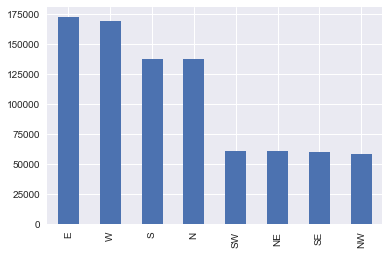

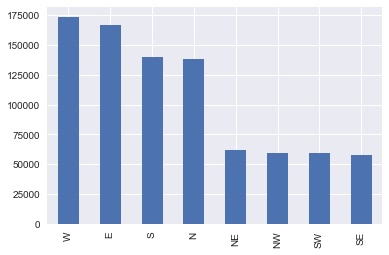

North Broad Street_N_North Broad Street_N                  7032
North Broad Street_S_North Broad Street_S                  6935
Walnut Street_W_Walnut Street_W                            5310
Chestnut Street_E_Chestnut Street_E                        5009
South Broad Street_N_South Broad Street_N                  4557
                                                           ... 
Putnam Avenue_NW_Pearl Street_SW                              1
Ridge Avenue_SE_Fairmount Avenue_SE                           1
South Stony Island Avenue_S_East 95th Street_E                1
West Huron Street_SW_North Clark Street_S                     1
Commonwealth Avenue Frontage Road Wb_W_Colborne Road_NW       1
Name: Path, Length: 15111, dtype: int64


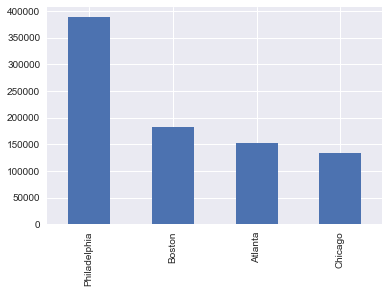

In [9]:
def plot_features( ):
    """Plot groups details for each feature variable
    """
    cat_cols = train[feature_cols].select_dtypes('O').columns
    for col in cat_cols:
        if(len(train[col].unique())<50):
            train[col].value_counts().plot(kind='bar')
            plt.show()
        else:
            print(train[col].value_counts())

plot_features( )

# Definitions

In [10]:
# global variables 
#Estimators = 100
random_state = 0 # seed
jobs = 2 # the number of jobs to run in parallel for both fit and predict.
folds = 5 # for Crossvalidation

# global objects
pp = pprint.PrettyPrinter(indent=4)

# Functions

In [11]:
def dataset_preprocess(y_target, test_size, random_state, join_vars):
    """Pre-process include dummy filters and delete extra columns.
    
    Keyword arguments:
    y_target -- target column name
    test_size -- data percentage to create test subset
    random_state -- seed for random steps
    join_vars -- an extra column that include target variables content
    """
    # Impact analysis of each variable
    if join_vars:
        train['AverageTotalTime'] = train[target_cols].sum(axis=1) / len(train[target_cols].columns)
        
    # keep only selected variables
    cols = set(feature_cols + [y_target]).difference(['EntryStreetName','ExitStreetName','Path'])
    full_set = pd.get_dummies(train[cols], columns=cat_cols)
    
    full_set.head()
    
    # split set
    y = full_set[y_target]
    Xs = full_set.drop(y_target, axis=1)
    X_train, X_test, y_train, y_test = train_valid_split(Xs, y, test_size = test_size, random_state=random_state)
    
    print ("Set details:")
    print ("Train: ")
    print ("Patterns: ", X_train.shape[0])
    print ("Variables: ", X_train.shape[1])
    
    print ("Test: ")
    print ("Patterns: ", X_test.shape[0])
    print ("Variables: ", X_test.shape[1])
    
    return X_train, X_test, y_train, y_test

In [12]:
def model_instance(estimators, jobs, random_state):
    """ Return a basic model definition
    
    Keyword arguments:
    estimators -- trees to build the forest
    jobs -- jobs for paralle trainning
    random_state -- seed for random steps
    """
    model = RandomForestRegressor(n_estimators=estimators, n_jobs=jobs, random_state=random_state)
    return model

In [13]:
def model_evaluation(model, X_eval, y_eval, folds):
    """ run crossvalidation at the way to evalute model performance
    
    Keyword arguments:
    model -- random forest basic definition
    X_eval -- Patterns 
    y_eval -- target variable
    folds -- folds for crossvalidation
    """
    print ("Evaluation dataset info: ")
    print ("Patterns(X): ", X_eval.shape[0])
    print ("Variables(X): ", X_eval.shape[1])
    
    print ("Patterns(Y): ", y_eval.shape)
    
    print ("Model details:")
    print (model)
    
    # R^2 (coefficient of determination) regression score function.
    scores = cross_validate(model, X_eval, y_eval, cv=folds,
                            scoring=('r2'), n_jobs=jobs,
                            return_train_score=True)

    print (scores)
    return scores

In [37]:
def out_details(scores_v):
    """ Predictions - Statistical details
    
    Keyword arguments:
    scores_v -- accuracy set
    """
    print ("mean: " + str(np.mean(scores_v)))
    print ("std: " + str(np.std(scores_v)))
    print ("min: " + str(np.min(scores_v)))
    print ("max:" + str(np.max(scores_v)))

# Code
Two mechanism have been taken account to improve the accuracy of our model.
* Cross validation - Evaluate model performance on cross validation set.
* Grid Search algorithm to automatically select the best parameters for an algorithm.


## Cross validation
Our first approach to improve accuracy takes account different cases to evaluate the model:
1. Based on the full dataset: Train and Test set size.
    * case 1: Test 20% - Train 80%
    * case 2: Test 30% - Train 70%
2. Base on target variables and target variables covariance 
    * DistanceToFirstStop_p80
    * TotalTimeStopped_p80
    * AverageTotalTime


In [15]:
estimators = 50

### Case 1: Test 20% - Train 80%

In [16]:
# dataset split
test_size = 0.2

#### DistanceToFirstStop_p80

In [17]:
# include or not a new variable, it means averange
average_total_time = False

# split dataset 
c1a_X_train, c1a_X_test, c1a_y_train, c1a_y_test = dataset_preprocess('DistanceToFirstStop_p80', test_size, random_state, average_total_time)

Set details:
Train: 
Patterns:  685927
Variables:  27
Test: 
Patterns:  171482
Variables:  27


In [18]:
c1a_model = model_instance(estimators, jobs, random_state)

In [19]:
c1a_scores_train = model_evaluation(c1a_model, c1a_X_train, c1a_y_train, folds)

Evaluation dataset info: 
Patterns(X):  685927
Variables(X):  27
Patterns(Y):  (685927,)
Model details:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
{'fit_time': array([183.48144126, 183.31089926, 180.5654068 , 180.65912414,
       127.35753036]), 'score_time': array([2.75801444, 2.7660346 , 2.5611186 , 2.66288209, 1.94954443]), 'test_score': array([0.68485305, 0.6872091 , 0.6739388 , 0.67472349, 0.68606158]), 'train_score': array([0.95434343, 0.95386559, 0.95463323, 0.954537  , 0.95398   ])}


In [20]:
print ("Crossvalidation:")
print ("Case 1: Test 20% - Train 80%")
print ("Target variable: DistanceToFirstStop_p80")
pp.pprint(c1a_scores_train)

Crossvalidation:
Case 1: Test 20% - Train 80%
Target variable: DistanceToFirstStop_p80
{   'fit_time': array([183.48144126, 183.31089926, 180.5654068 , 180.65912414,
       127.35753036]),
    'score_time': array([2.75801444, 2.7660346 , 2.5611186 , 2.66288209, 1.94954443]),
    'test_score': array([0.68485305, 0.6872091 , 0.6739388 , 0.67472349, 0.68606158]),
    'train_score': array([0.95434343, 0.95386559, 0.95463323, 0.954537  , 0.95398   ])}


#### TotalTimeStopped_p80

In [21]:
# include or not a new variable, it means averange
average_total_time = False

# split dataset 
c1b_X_train, c1b_X_test, c1b_y_train, c1b_y_test = dataset_preprocess('TotalTimeStopped_p80', test_size, random_state, average_total_time)

Set details:
Train: 
Patterns:  685927
Variables:  27
Test: 
Patterns:  171482
Variables:  27


In [22]:
c1b_model = model_instance(estimators, jobs, random_state)

In [23]:
c1b_scores_train = model_evaluation(c1b_model, c1b_X_train, c1b_y_train, folds)

Evaluation dataset info: 
Patterns(X):  685927
Variables(X):  27
Patterns(Y):  (685927,)
Model details:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
{'fit_time': array([176.42590666, 179.44583225, 175.91748142, 175.41127753,
       125.64733696]), 'score_time': array([2.66387844, 2.65988803, 2.76512718, 2.76460719, 1.85369611]), 'test_score': array([0.61779228, 0.61927044, 0.61464962, 0.62331858, 0.62694939]), 'train_score': array([0.94555964, 0.94558365, 0.94518108, 0.94528971, 0.94539087])}


In [24]:
print ("Crossvalidation:")
print ("Case 1: Test 20% - Train 80%")
print ("Target variable: TotalTimeStopped_p80")
pp.pprint(c1b_scores_train)

Crossvalidation:
Case 1: Test 20% - Train 80%
Target variable: TotalTimeStopped_p80
{   'fit_time': array([176.42590666, 179.44583225, 175.91748142, 175.41127753,
       125.64733696]),
    'score_time': array([2.66387844, 2.65988803, 2.76512718, 2.76460719, 1.85369611]),
    'test_score': array([0.61779228, 0.61927044, 0.61464962, 0.62331858, 0.62694939]),
    'train_score': array([0.94555964, 0.94558365, 0.94518108, 0.94528971, 0.94539087])}


#### AverageTotalTime

In [25]:
# include or not a new variable, it means averange
average_total_time = True

# split dataset 
c1c_X_train, c1c_X_test, c1c_y_train, c1c_y_test = dataset_preprocess('AverageTotalTime', test_size, random_state, average_total_time)

Set details:
Train: 
Patterns:  685927
Variables:  27
Test: 
Patterns:  171482
Variables:  27


In [26]:
c1c_model = model_instance(estimators, jobs, random_state)

In [27]:
c1c_scores_train = model_evaluation(c1c_model, c1c_X_train, c1c_y_train, folds)

Evaluation dataset info: 
Patterns(X):  685927
Variables(X):  27
Patterns(Y):  (685927,)
Model details:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
{'fit_time': array([173.04568195, 173.95222521, 177.15233684, 175.8268795 ,
       123.91860843]), 'score_time': array([2.66387677, 2.66088438, 2.66387606, 2.66088772, 1.84300208]), 'test_score': array([0.70349982, 0.70976823, 0.68997112, 0.68814208, 0.70147055]), 'train_score': array([0.95666354, 0.9565084 , 0.95652345, 0.95708922, 0.95717404])}


In [28]:
print ("Crossvalidation:")
print ("Case 1: Test 20% - Train 80%")
print ("Target variable: AverageTotalTime")
pp.pprint(c1c_scores_train)

Crossvalidation:
Case 1: Test 20% - Train 80%
Target variable: AverageTotalTime
{   'fit_time': array([173.04568195, 173.95222521, 177.15233684, 175.8268795 ,
       123.91860843]),
    'score_time': array([2.66387677, 2.66088438, 2.66387606, 2.66088772, 1.84300208]),
    'test_score': array([0.70349982, 0.70976823, 0.68997112, 0.68814208, 0.70147055]),
    'train_score': array([0.95666354, 0.9565084 , 0.95652345, 0.95708922, 0.95717404])}


### Case 2: Test 30% - Train 70%

In [29]:
# dataset split
test_size = 0.3

#### DistanceToFirstStop_p80

In [30]:
# include or not a new variable, it means averange
average_total_time = False

# split dataset 
c2a_X_train, c2a_X_test, c2a_y_train, c2a_y_test = dataset_preprocess('DistanceToFirstStop_p80', test_size, random_state, average_total_time)

Set details:
Train: 
Patterns:  600186
Variables:  27
Test: 
Patterns:  257223
Variables:  27


In [31]:
c2a_model = model_instance(estimators, jobs, random_state)

In [32]:
c2a_scores_train = model_evaluation(c2a_model, c2a_X_train, c2a_y_train, folds)

Evaluation dataset info: 
Patterns(X):  600186
Variables(X):  27
Patterns(Y):  (600186,)
Model details:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
{'fit_time': array([152.04965711, 153.04994941, 155.51406765, 155.65469551,
       106.86837482]), 'score_time': array([2.35420489, 2.36121774, 2.46840048, 2.46141815, 1.64518642]), 'test_score': array([0.68014907, 0.67463141, 0.67643863, 0.67047864, 0.68910308]), 'train_score': array([0.95364926, 0.95365705, 0.95398749, 0.95466378, 0.9541699 ])}


In [33]:
print ("Crossvalidation:")
print ("Case 2: Test 30% - Train 70%")
print ("Target variable: DistanceToFirstStop_p80")
pp.pprint(c2a_scores_train)

Crossvalidation:
Case 2: Test 30% - Train 70%
Target variable: DistanceToFirstStop_p80
{   'fit_time': array([152.04965711, 153.04994941, 155.51406765, 155.65469551,
       106.86837482]),
    'score_time': array([2.35420489, 2.36121774, 2.46840048, 2.46141815, 1.64518642]),
    'test_score': array([0.68014907, 0.67463141, 0.67643863, 0.67047864, 0.68910308]),
    'train_score': array([0.95364926, 0.95365705, 0.95398749, 0.95466378, 0.9541699 ])}


#### TotalTimeStopped_p80

In [34]:
# include or not a new variable, it means averange
average_total_time = False

# split dataset 
c2b_X_train, c2b_X_test, c2b_y_train, c2b_y_test = dataset_preprocess('TotalTimeStopped_p80', test_size, random_state, average_total_time)

Set details:
Train: 
Patterns:  600186
Variables:  27
Test: 
Patterns:  257223
Variables:  27


In [35]:
c2b_model = model_instance(estimators, jobs, random_state)

In [36]:
c2b_scores_train = model_evaluation(c2b_model, c2b_X_train, c2b_y_train, folds)

Evaluation dataset info: 
Patterns(X):  600186
Variables(X):  27
Patterns(Y):  (600186,)
Model details:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
{'fit_time': array([150.7272768 , 152.24135041, 162.21045303, 161.55179048,
       116.91536236]), 'score_time': array([2.46153998, 2.35969257, 2.25525546, 2.45725679, 1.84684324]), 'test_score': array([0.61115784, 0.6131294 , 0.61145914, 0.61645556, 0.61788703]), 'train_score': array([0.94425585, 0.94398288, 0.94443402, 0.94439748, 0.94434297])}


In [37]:
print ("Crossvalidation:")
print ("Case 1: Test 20% - Train 80%")
print ("Target variable: TotalTimeStopped_p80")
pp.pprint(c2b_scores_train)

Crossvalidation:
Case 1: Test 20% - Train 80%
Target variable: TotalTimeStopped_p80
{   'fit_time': array([150.7272768 , 152.24135041, 162.21045303, 161.55179048,
       116.91536236]),
    'score_time': array([2.46153998, 2.35969257, 2.25525546, 2.45725679, 1.84684324]),
    'test_score': array([0.61115784, 0.6131294 , 0.61145914, 0.61645556, 0.61788703]),
    'train_score': array([0.94425585, 0.94398288, 0.94443402, 0.94439748, 0.94434297])}


#### AverageTotalTime

In [38]:
# include or not a new variable, it means averange
average_total_time = True

# split dataset 
c2c_X_train, c2c_X_test, c2c_y_train, c2c_y_test = dataset_preprocess('AverageTotalTime', test_size, random_state, average_total_time)

Set details:
Train: 
Patterns:  600186
Variables:  27
Test: 
Patterns:  257223
Variables:  27


In [39]:
c2c_model = model_instance(estimators, jobs, random_state)

In [40]:
c2c_scores_train = model_evaluation(c2c_model, c2c_X_train, c2c_y_train, folds)

Evaluation dataset info: 
Patterns(X):  600186
Variables(X):  27
Patterns(Y):  (600186,)
Model details:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
{'fit_time': array([177.44961476, 176.76218653, 182.43531108, 183.55256557,
       123.32601213]), 'score_time': array([2.45303726, 2.35155606, 2.35666823, 3.16710234, 1.74895906]), 'test_score': array([0.69651421, 0.69311466, 0.68778393, 0.68203548, 0.69679361]), 'train_score': array([0.95551885, 0.95503963, 0.955672  , 0.95633573, 0.95607314])}


In [41]:
print ("Crossvalidation:")
print ("Case 1: Test 20% - Train 80%")
print ("Target variable: AverageTotalTime")
pp.pprint(c2c_scores_train)

Crossvalidation:
Case 1: Test 20% - Train 80%
Target variable: AverageTotalTime
{   'fit_time': array([177.44961476, 176.76218653, 182.43531108, 183.55256557,
       123.32601213]),
    'score_time': array([2.45303726, 2.35155606, 2.35666823, 3.16710234, 1.74895906]),
    'test_score': array([0.69651421, 0.69311466, 0.68778393, 0.68203548, 0.69679361]),
    'train_score': array([0.95551885, 0.95503963, 0.955672  , 0.95633573, 0.95607314])}


## Grid Search

In [42]:
def test_values(n_estimators):
    #n_estimators = [100]#, 300], 500, 800, 1200]
    max_depth = [5, 8, 15, 25, 30]
    min_samples_split = [2, 5, 10, 15, 100]
    min_samples_leaf = [1, 2, 5, 10] 

    hyperRF = dict(n_estimators = n_estimators, max_depth = max_depth,  
                 min_samples_split = min_samples_split, 
                 min_samples_leaf = min_samples_leaf)
    
    forest = RandomForestRegressor(random_state = 1)
    gridF = GridSearchCV(forest, hyperRF, cv = 3, verbose = 1, 
                      n_jobs = -1)
    print(gridF)
    
    bestF = gridF.fit(c2c_X_train, c2c_y_train)
    print (bestF)
    return bestF, forest

In [ ]:
forest_100 = test_values([100])

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [2, 5, 10, 15, 100], 'n_estimators': [100], 'max_depth': [5, 8, 15, 25, 30], 'min_samples_leaf': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 300.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 589.1min finished
GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [2, 5, 10, 15, 100], 'n_estimators': [100], 'max_depth': [5, 8, 15, 25, 30], 'min_samples_leaf': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [ ]:
def RMSE(actual,preds):
    return np.sqrt(mean_squared_error(actual,preds))

def get_evaluations(model):
    preds = model.predict(X_train)
    plt.hist(np.log1p(preds),bins=100)
    plt.show();
    print('train_rmse: ',RMSE(y_train,preds))
                    
    preds = model.predict(X_valid)
    plt.hist(np.log1p(preds),bins=100)
    plt.show()
    print('valid_rmse: ',RMSE(y_valid,preds))
    
get_evaluations(model)

## Accuracy analisys
### Case 1: Test 20% - Train 80%

#### DistanceToFirstStop_p80

In [38]:
print ("Test")
out_details([0.68485305, 0.6872091 , 0.6739388 , 0.67472349, 0.68606158])
print ("Train")
out_details([0.95434343, 0.95386559, 0.95463323, 0.954537  , 0.95398])

Test
mean: 0.681357204
std: 0.005790261806532075
min: 0.6739388
max:0.6872091
Train
mean: 0.9542718499999999
std: 0.0003020752665810027
min: 0.95386559
max:0.95463323


#### TotalTimeStopped_p80

In [39]:
print ("Test")
out_details([0.61779228, 0.61927044, 0.61464962, 0.62331858, 0.62694939])
print ("Train")
out_details([0.94555964, 0.94558365, 0.94518108, 0.94528971, 0.94539087])

Test
mean: 0.620396062
std: 0.004302453267280901
min: 0.61464962
max:0.62694939
Train
mean: 0.9454009899999999
std: 0.00015451896906206594
min: 0.94518108
max:0.94558365


#### AverageTotalTime

In [40]:
print ("Test")
out_details([0.70349982, 0.70976823, 0.68997112, 0.68814208, 0.70147055])
print ("Train")
out_details([0.95666354, 0.9565084 , 0.95652345, 0.95708922, 0.95717404])

Test
mean: 0.6985703600000001
std: 0.008255893928589437
min: 0.68814208
max:0.70976823
Train
mean: 0.95679173
std: 0.00028402252009300066
min: 0.9565084
max:0.95717404


### Case 2: Test 30% - Train 70%
#### DistanceToFirstStop_p80

In [41]:
print ("Test")
out_details([0.68014907, 0.67463141, 0.67643863, 0.67047864, 0.68910308])
print ("Train")
out_details([0.95364926, 0.95365705, 0.95398749, 0.95466378, 0.9541699 ])

Test
mean: 0.678160166
std: 0.0062948352278374845
min: 0.67047864
max:0.68910308
Train
mean: 0.9540254960000001
std: 0.00037603441824383754
min: 0.95364926
max:0.95466378


#### TotalTimeStopped_p80

In [42]:
print ("Test")
out_details([0.61115784, 0.6131294 , 0.61145914, 0.61645556, 0.61788703])
print ("Train")
out_details([0.94425585, 0.94398288, 0.94443402, 0.94439748, 0.94434297])

Test
mean: 0.614017794
std: 0.0026992214198735243
min: 0.61115784
max:0.61788703
Train
mean: 0.94428264
std: 0.00016144200234140865
min: 0.94398288
max:0.94443402


#### AverageTotalTime

In [43]:
print ("Test")
out_details([0.69651421, 0.69311466, 0.68778393, 0.68203548, 0.69679361])
print ("Train")
out_details([0.95551885, 0.95503963, 0.955672  , 0.95633573, 0.95607314])

Test
mean: 0.691248378
std: 0.005636337154441329
min: 0.68203548
max:0.69679361
Train
mean: 0.9557278700000001
std: 0.00044926390182163645
min: 0.95503963
max:0.95633573


In [51]:
def RMSE(actual,preds):
    return np.sqrt(mean_squared_error(actual,preds))

In [47]:
# include or not a new variable, it means averange
average_total_time = True
test_size = 0.2

# split dataset 
X_train, X_test, y_train, y_test = dataset_preprocess('AverageTotalTime', test_size, random_state, average_total_time)

Set details:
Train: 
('Patterns: ', 685927)
('Variables: ', 27)
Test: 
('Patterns: ', 171482)
('Variables: ', 27)


In [48]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [49]:
ft = model.fit(X_train,y_train)

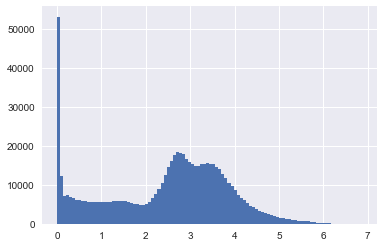

('train_rmse: ', 8.447114507756082)


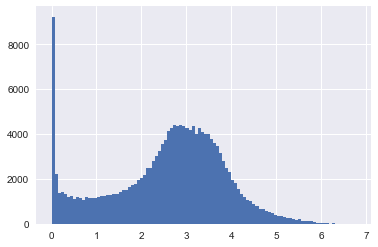

('valid_rmse: ', 22.718671363546946)


In [53]:
preds = model.predict(X_train)
plt.hist(np.log1p(preds),bins=100)
plt.show();
print('train_rmse: ',RMSE(y_train,preds))
               
preds = model.predict(X_test)
plt.hist(np.log1p(preds),bins=100)
plt.show()
print('valid_rmse: ',RMSE(y_test,preds))

In [ ]:
scores_train = model_evaluation(model, X_train, y_train, folds)

Evaluation dataset info: 
('Patterns(X): ', 685927)
('Variables(X): ', 27)
('Patterns(Y): ', (685927,))
Model details:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
